<h2>Diffusion Through a Crack</h2>

Simulate an unbiased random walk $(Pr(H) = Pr(T) = 0.5)$ with some obstacles.

(a) Put a reflection barrier at $x = –4$, i.e., the walk may land at –4 but may not stay there, and
the next step must be to –3. Plot a sample path and a histogram.

(b) Next, add a partial block at $x = 6$, i.e., at $x = 6$ there is only a 0.25 chance of going to 7
and a 0.75 chance of going to 5 (same for 7 to 6 ). Plot a histogram.


These are results that are hard to get in any way other than by simulation

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
        
def random_walk(step_n = 10000, reflection_bar=False, partial_block=False):
    #set params
    step_set = [-1,1]
    pos = 0
    path = []

    #simulate steps in 1D
    for i in range(step_n):
        direction = np.random.choice(step_set)
        
        if reflection_bar:
            if pos == -4: direction = 1
                
        if partial_block:
            if pos in [6,7]: #0.75 chance of backtracking, 0.25 chance of increasing step
                direction = np.random.choice(step_set, p=[0.75,0.25])
                
        pos += direction
        path.append(pos)
        
    return path

def plot_path(path, title):
    #plot the path
    plt.figure(figsize=(22,6),dpi=200)
    plt.subplot(1,2,1)
    plt.title(f"{title} Path", size=20)
    plt.scatter(np.arange(len(path)), path, s=0.5)
    plt.subplot(1,2,2)
    plt.title(f"{title} Histogram", size=20)
    plt.hist(path)
    plt.show()
    

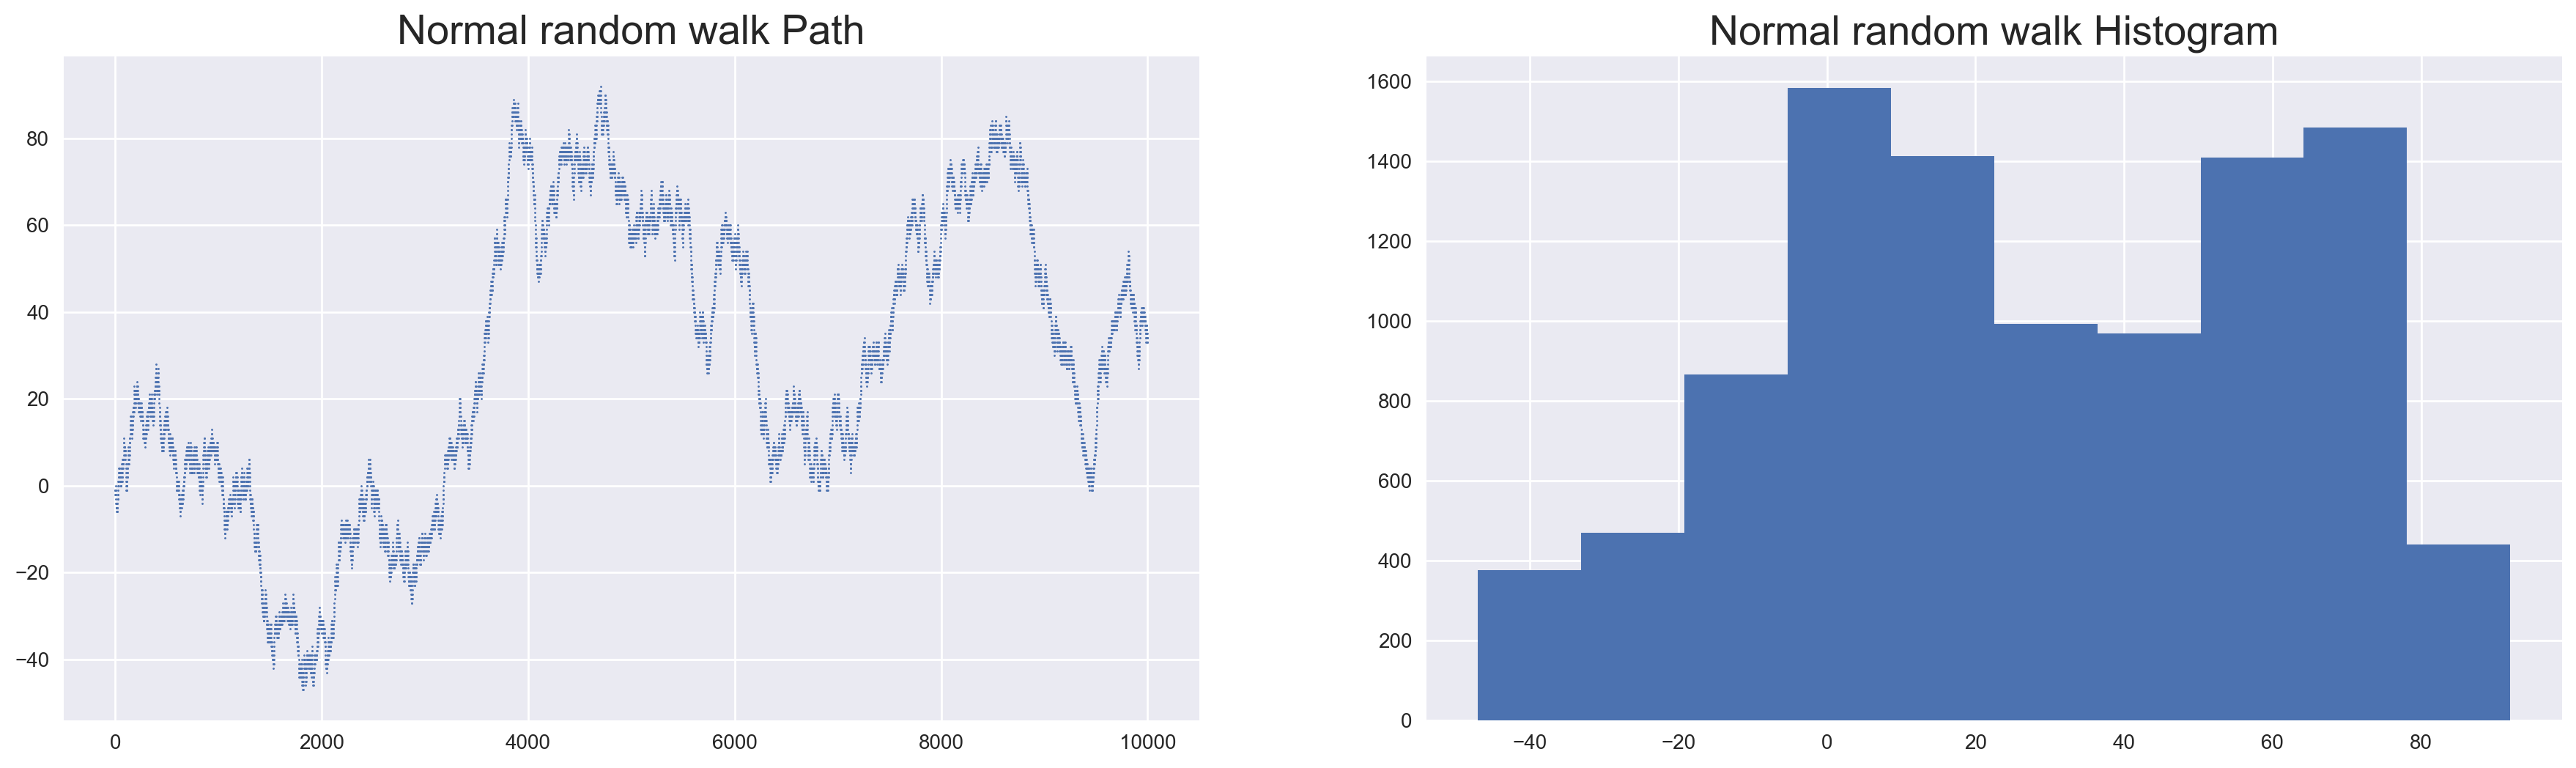

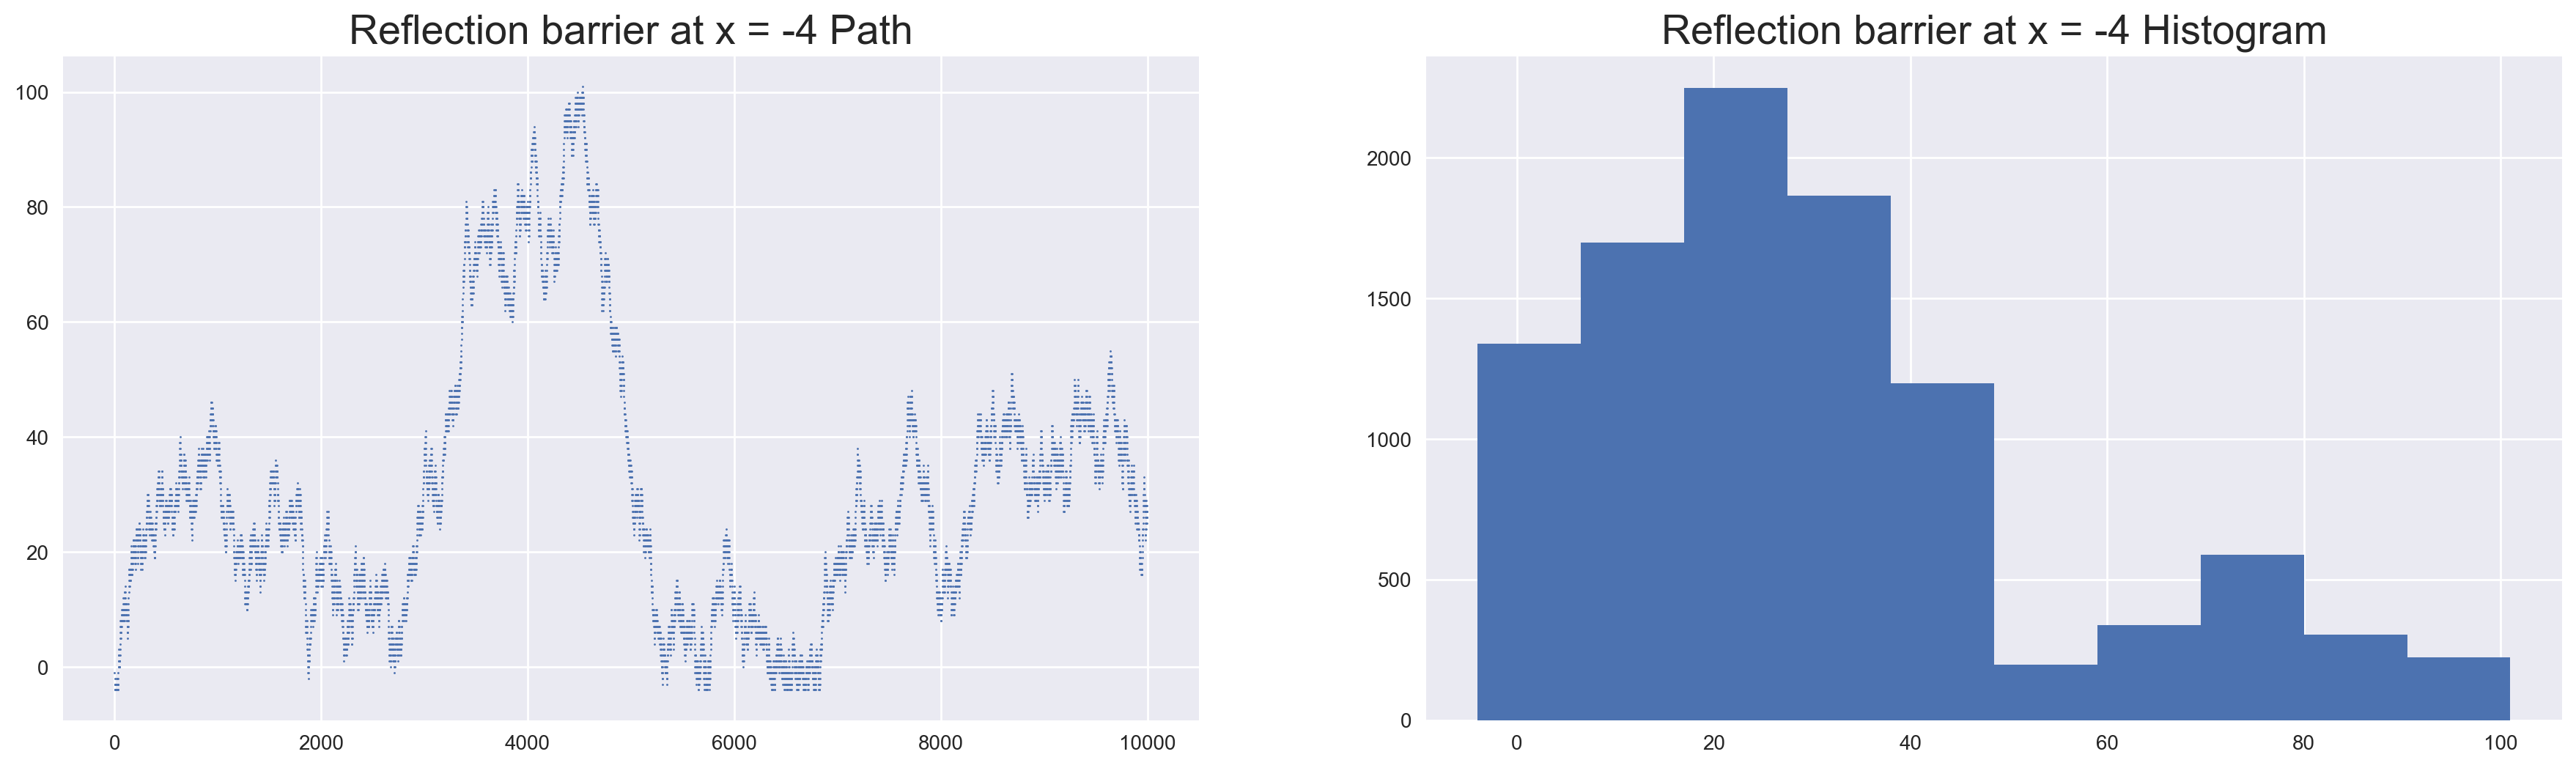

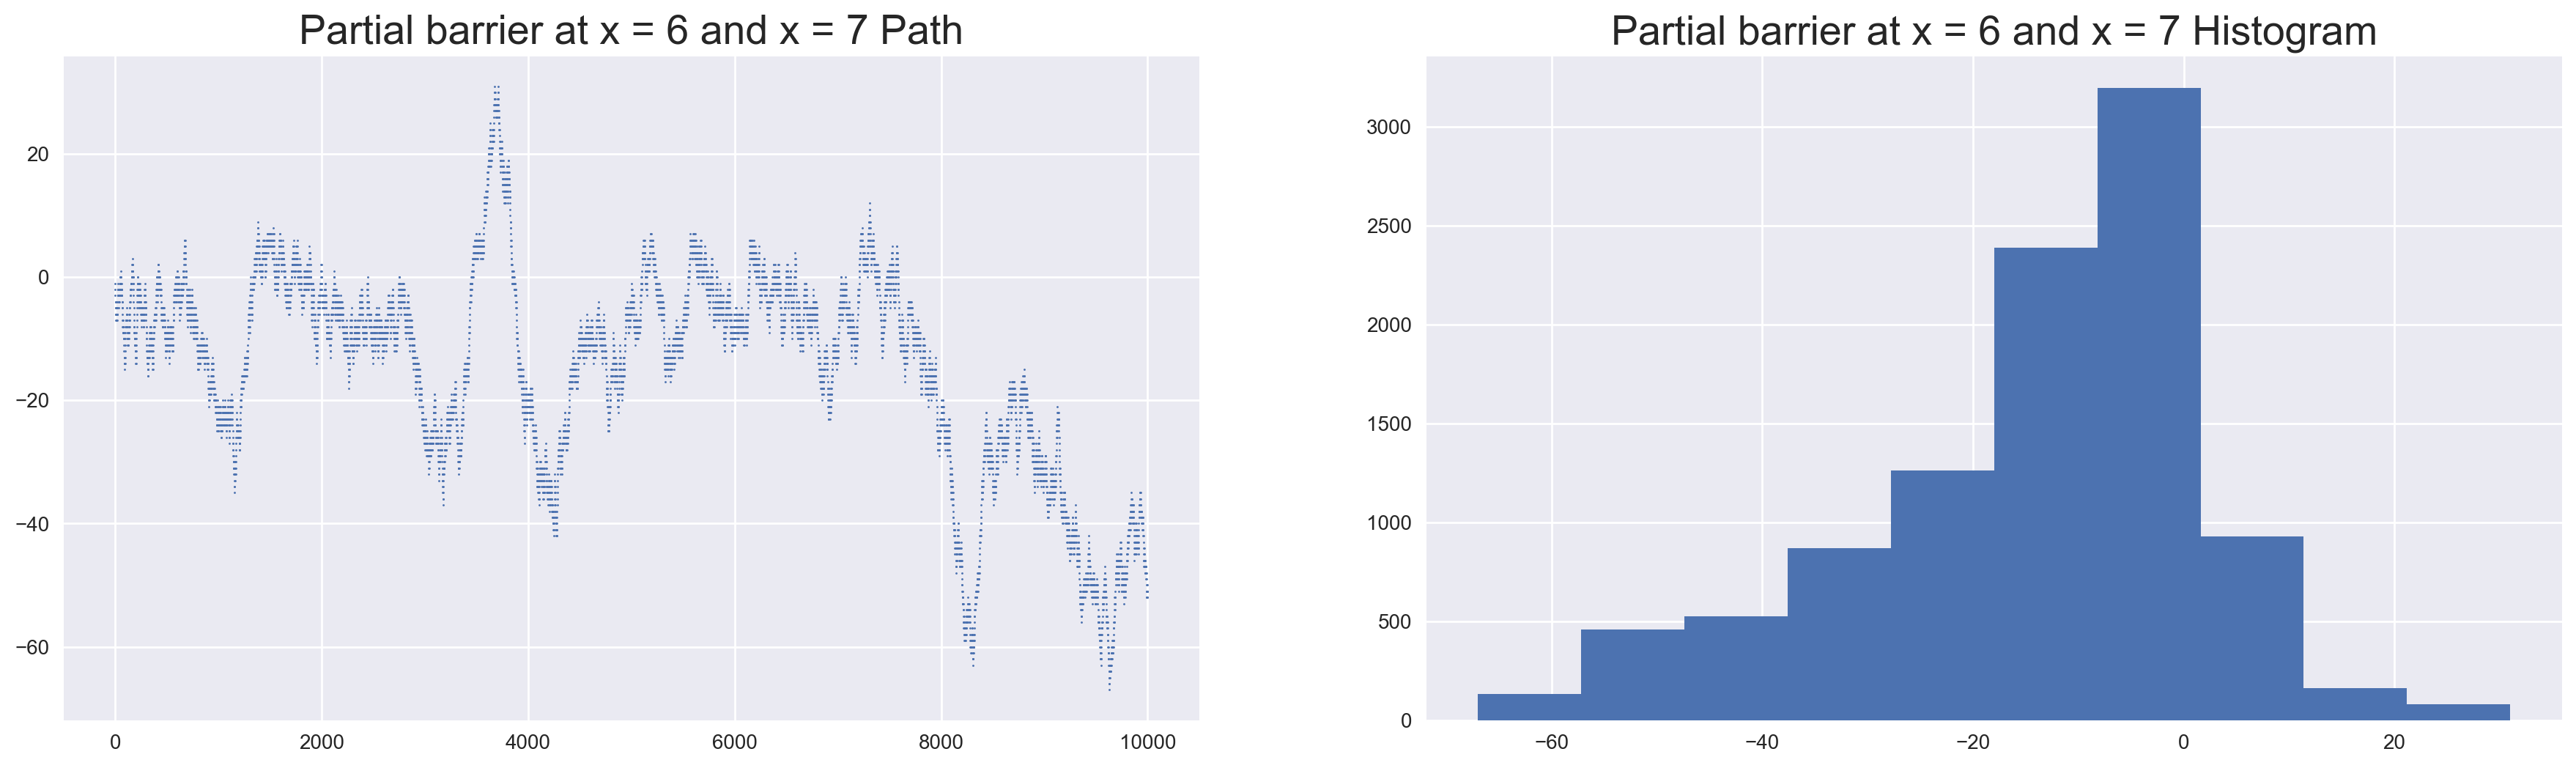

In [55]:
normal_path = random_walk()
plot_path(normal_path, "Normal random walk")

reflection_path = random_walk(reflection_bar = True)
plot_path(reflection_path, "Reflection barrier at x = -4")

block_path = random_walk(partial_block = True)
plot_path(block_path, "Partial barrier at x = 6 and x = 7")

<h2>Wiener process/Brownian motion</h2>

● Simulate a random walk in the plane as follows.

   - Start at the origin.

   - From any given position, choose a direction from 0 to 360 degrees equally likely,
    that is, uniformly on [0, 360).

   - Next, choose a step size according to a Gaussian (normal) distribution with mean 0
    and variance $\sigma^2$ .

   - Advance to that position and continue.


● Take $\sigma^2$ to be, variously, 0.5, 1, 2, the idea being to see what effect variance has on the
walk.

● Take the number of steps to be, variously, 20, 400, 1600, again to gauge the effect.

● Show a typical walk (i.e., a sample path) for one of the 1600 (or more) steps. Also, instead
of histogramming, show a density plot, that is for several walkers, plot a point in the plane
where the walker stops.

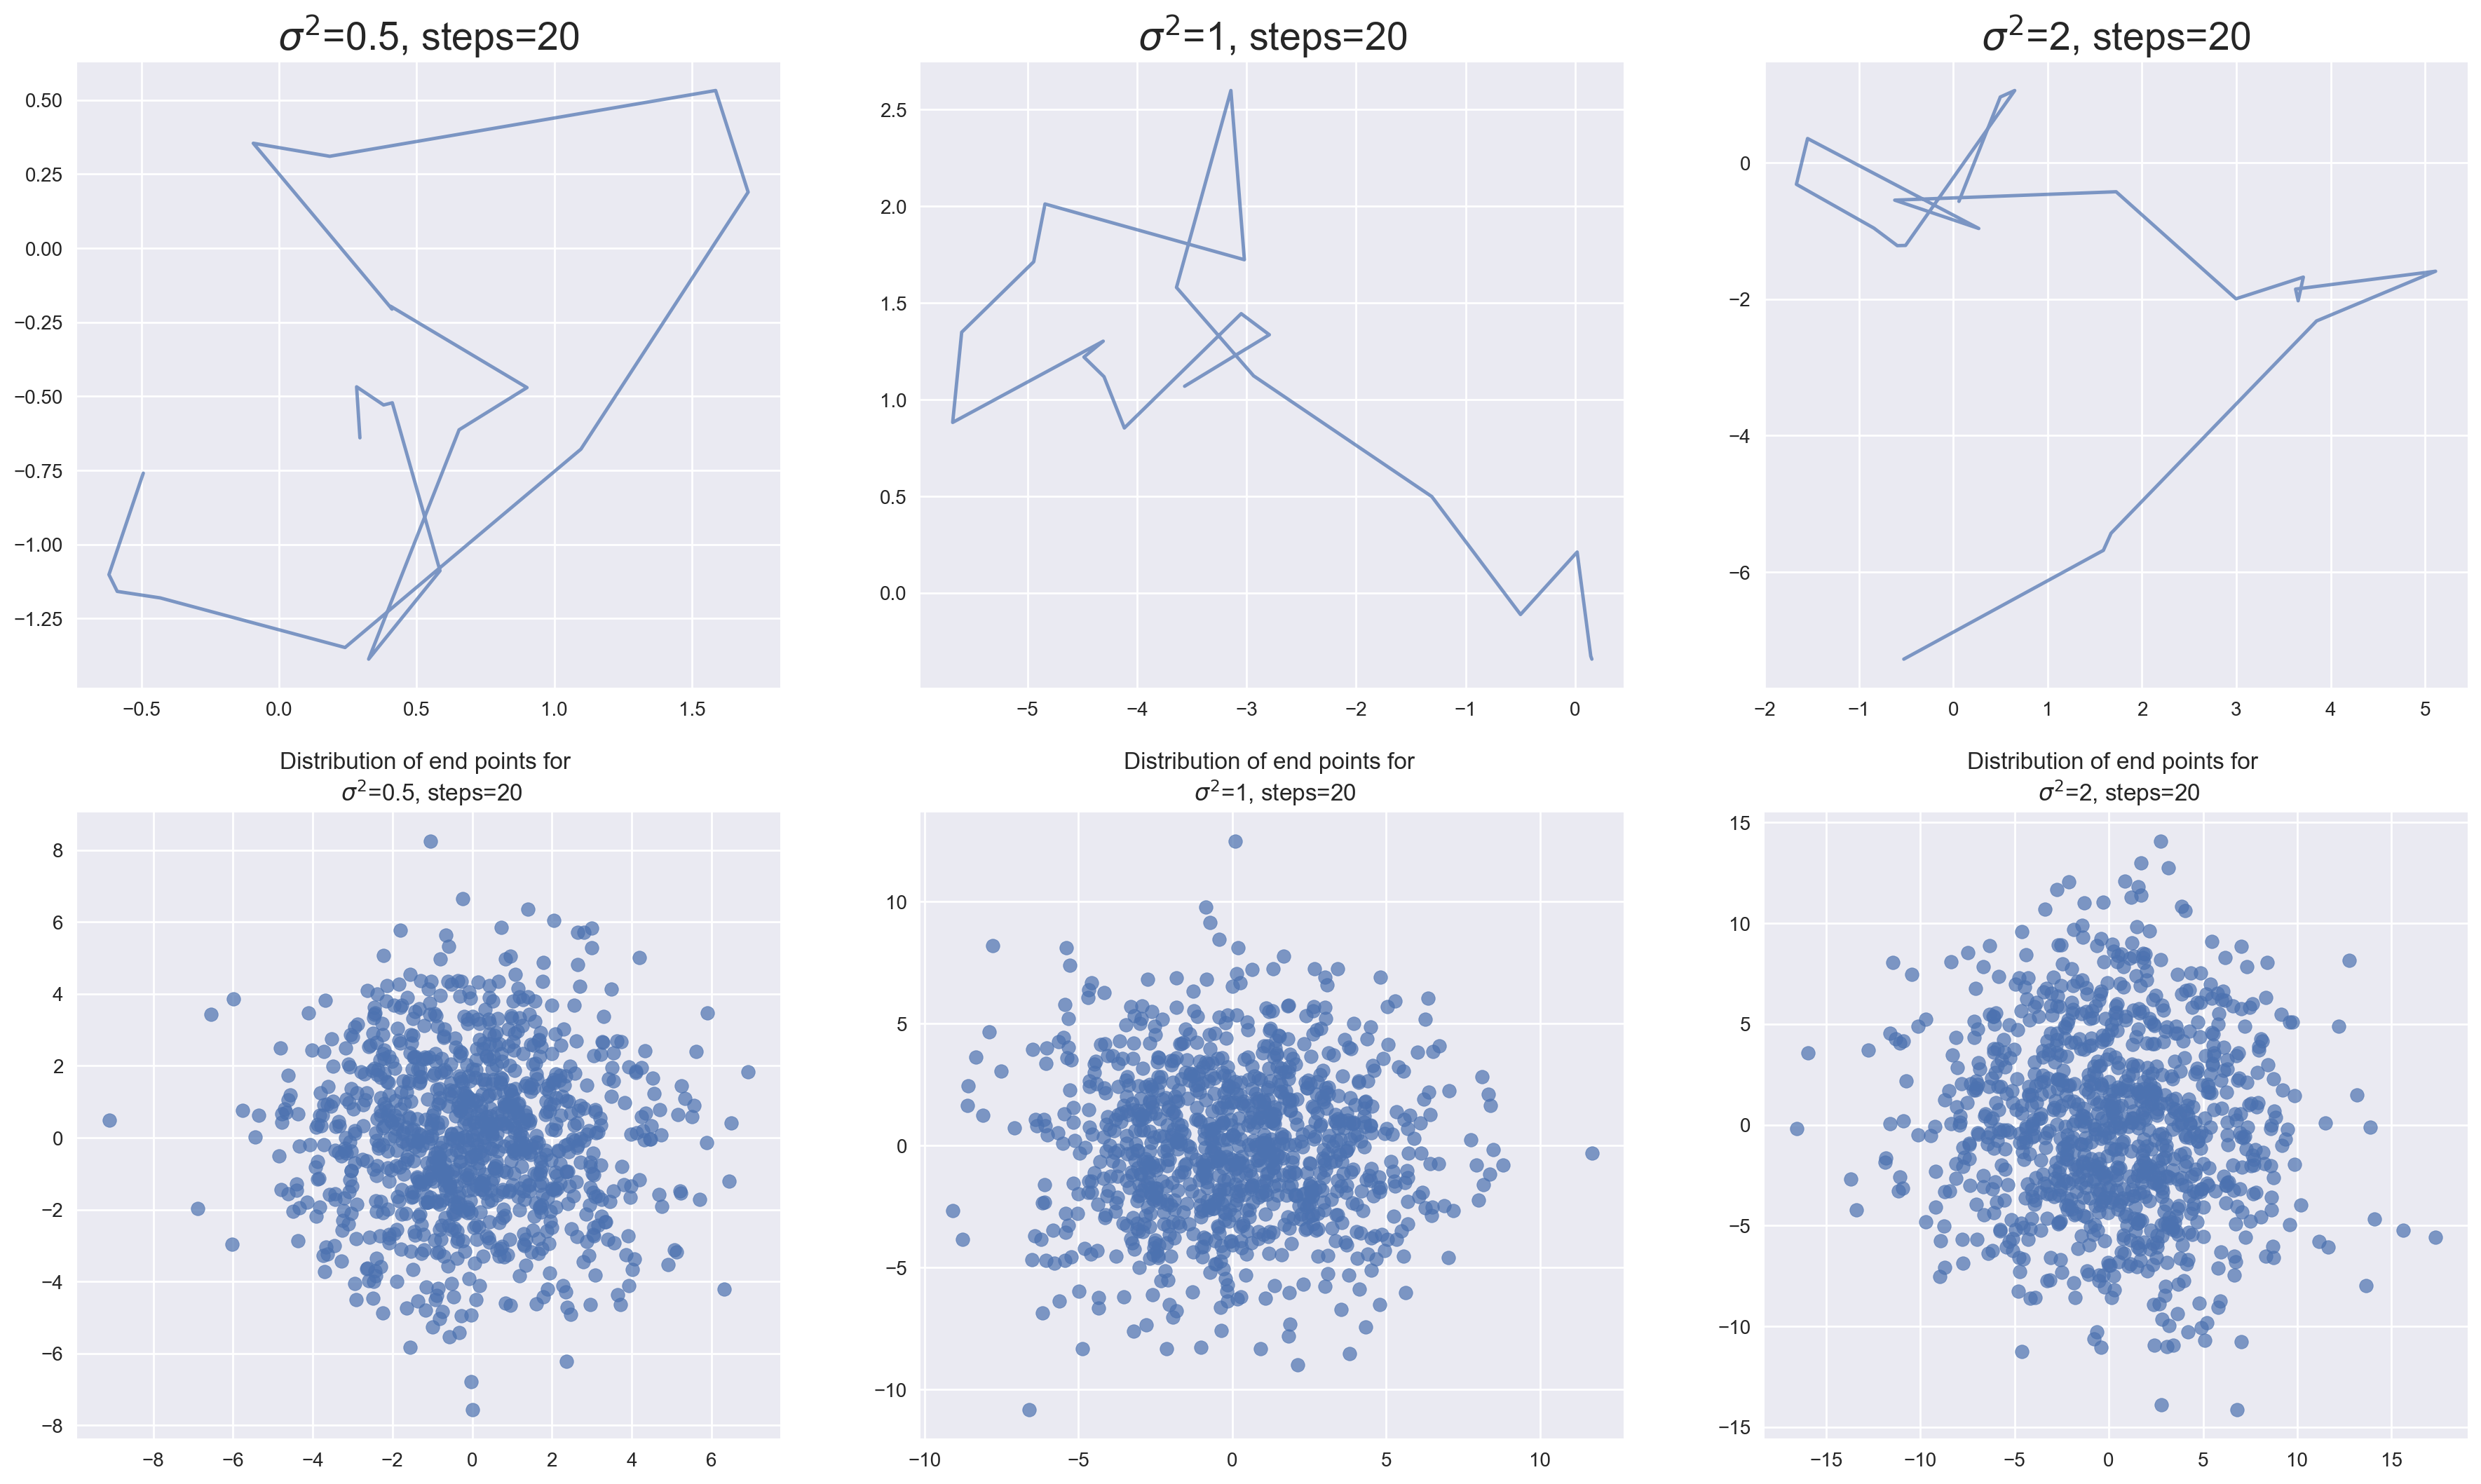

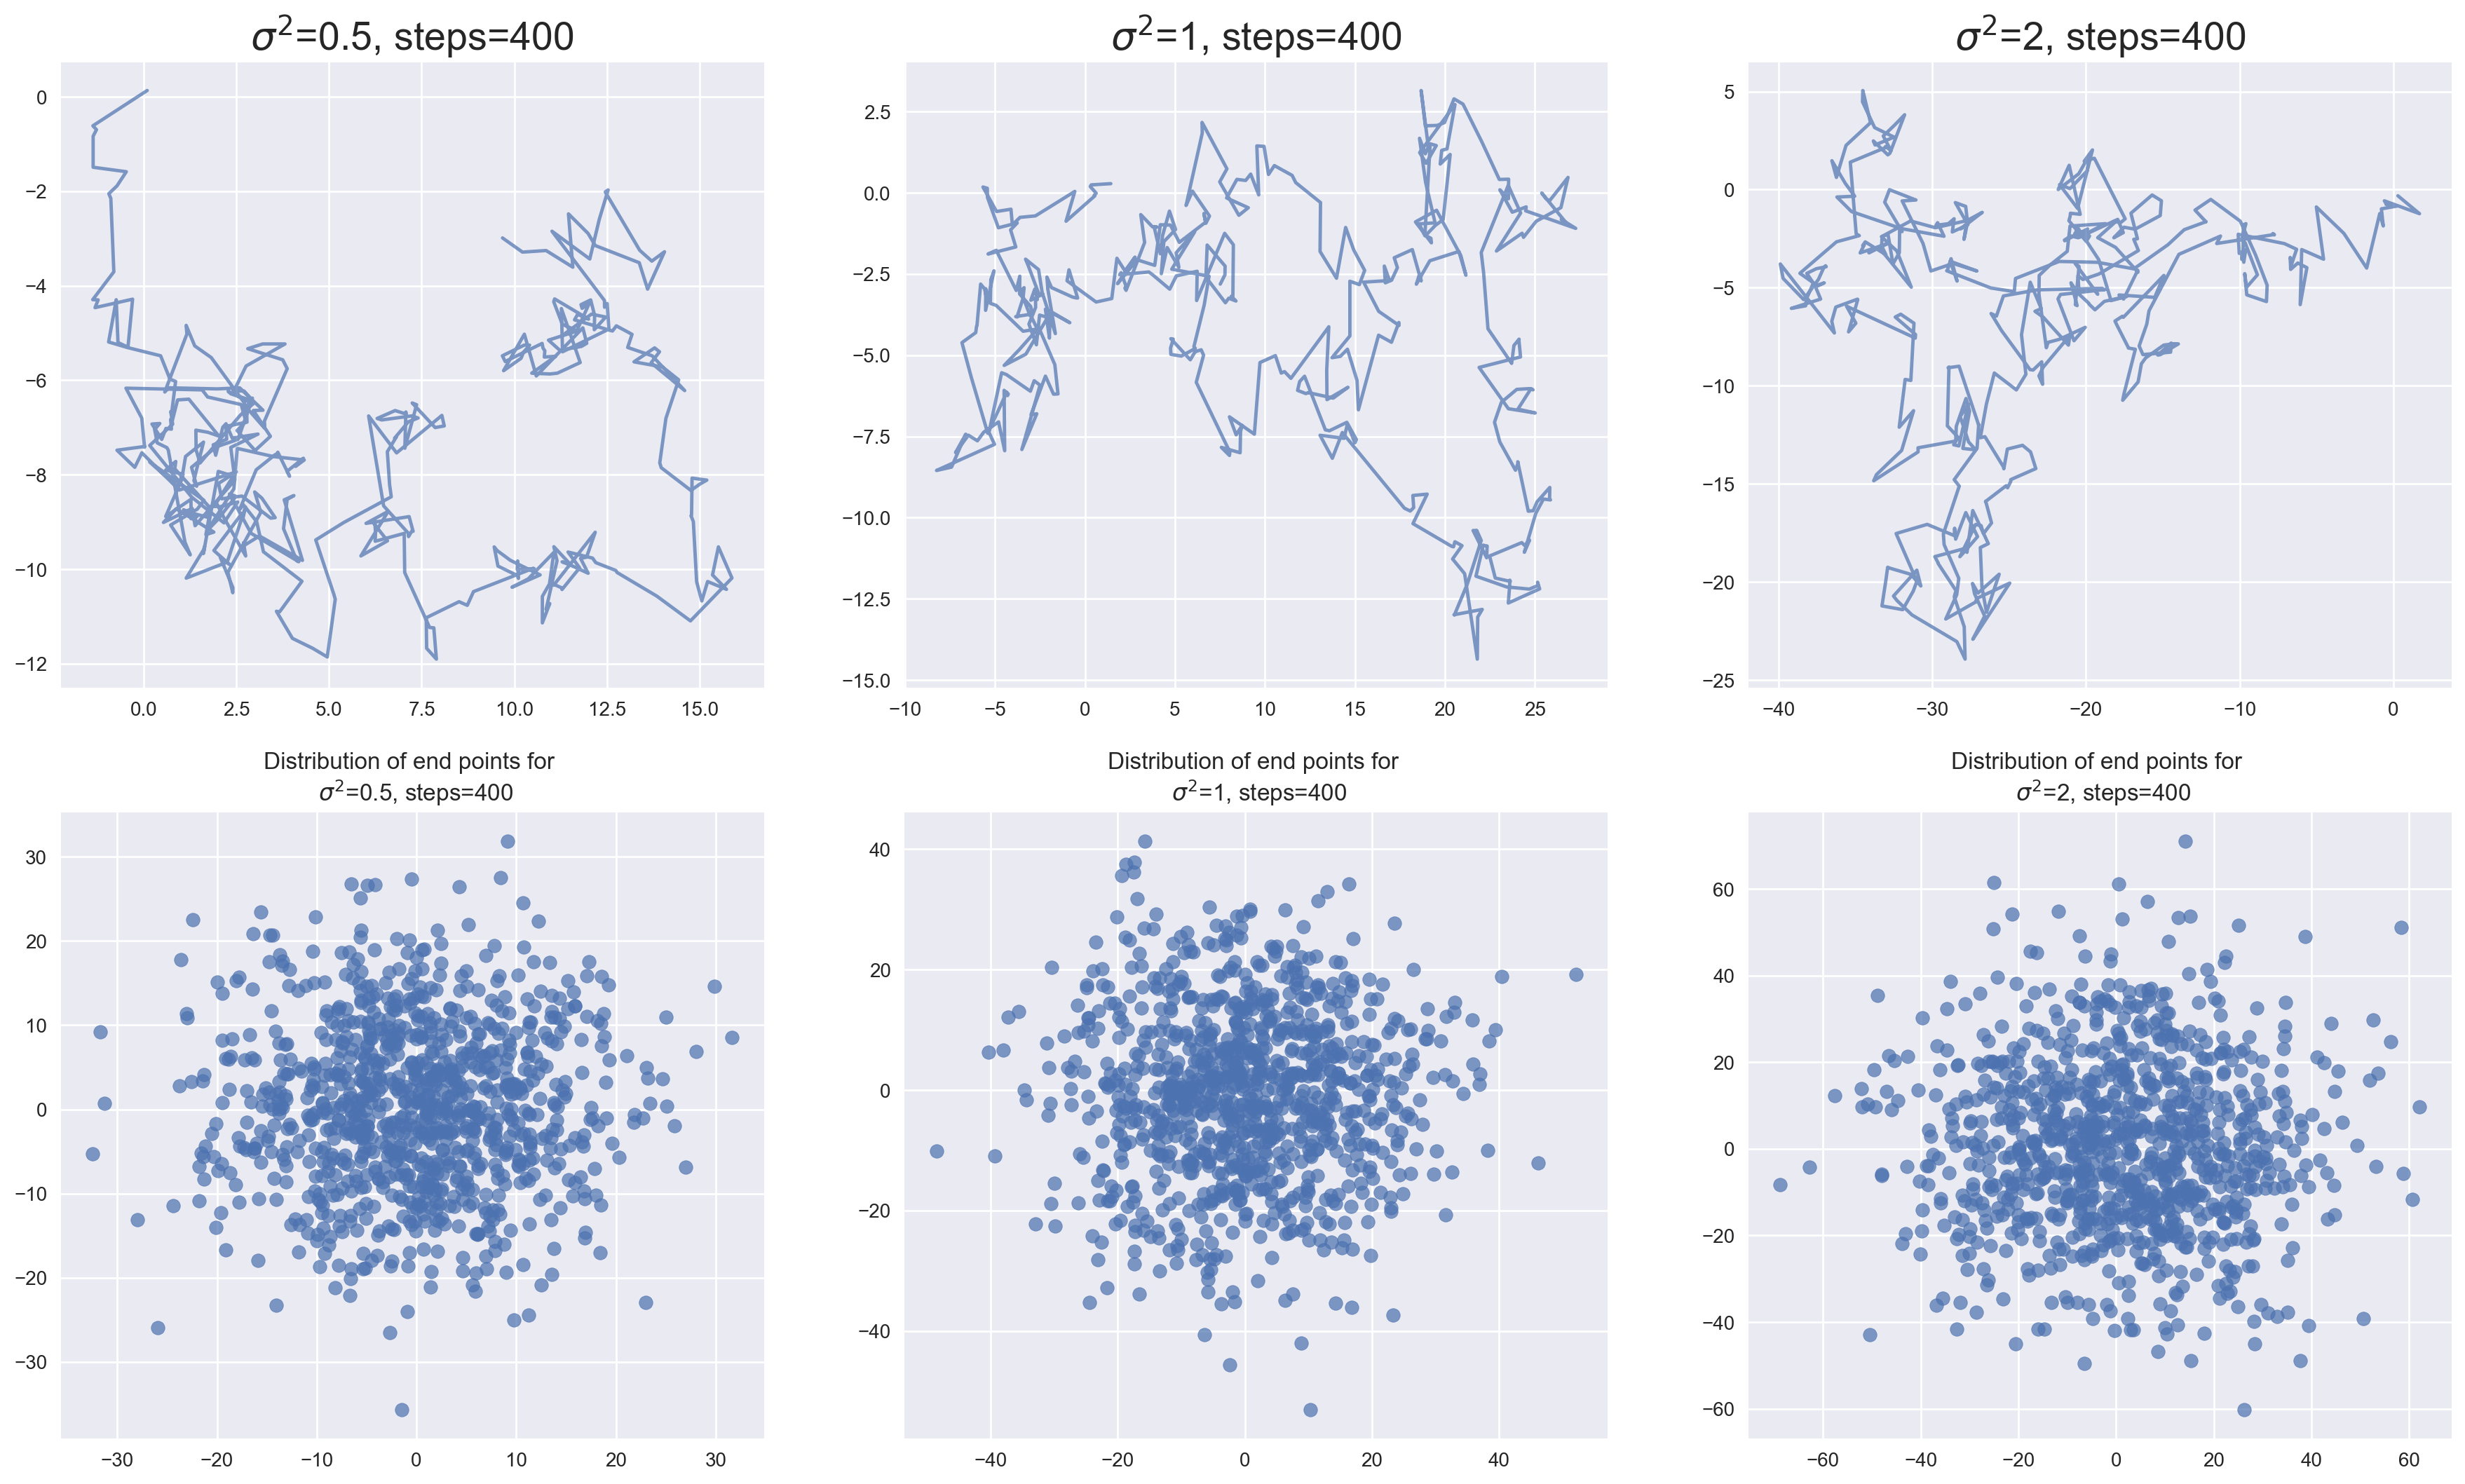

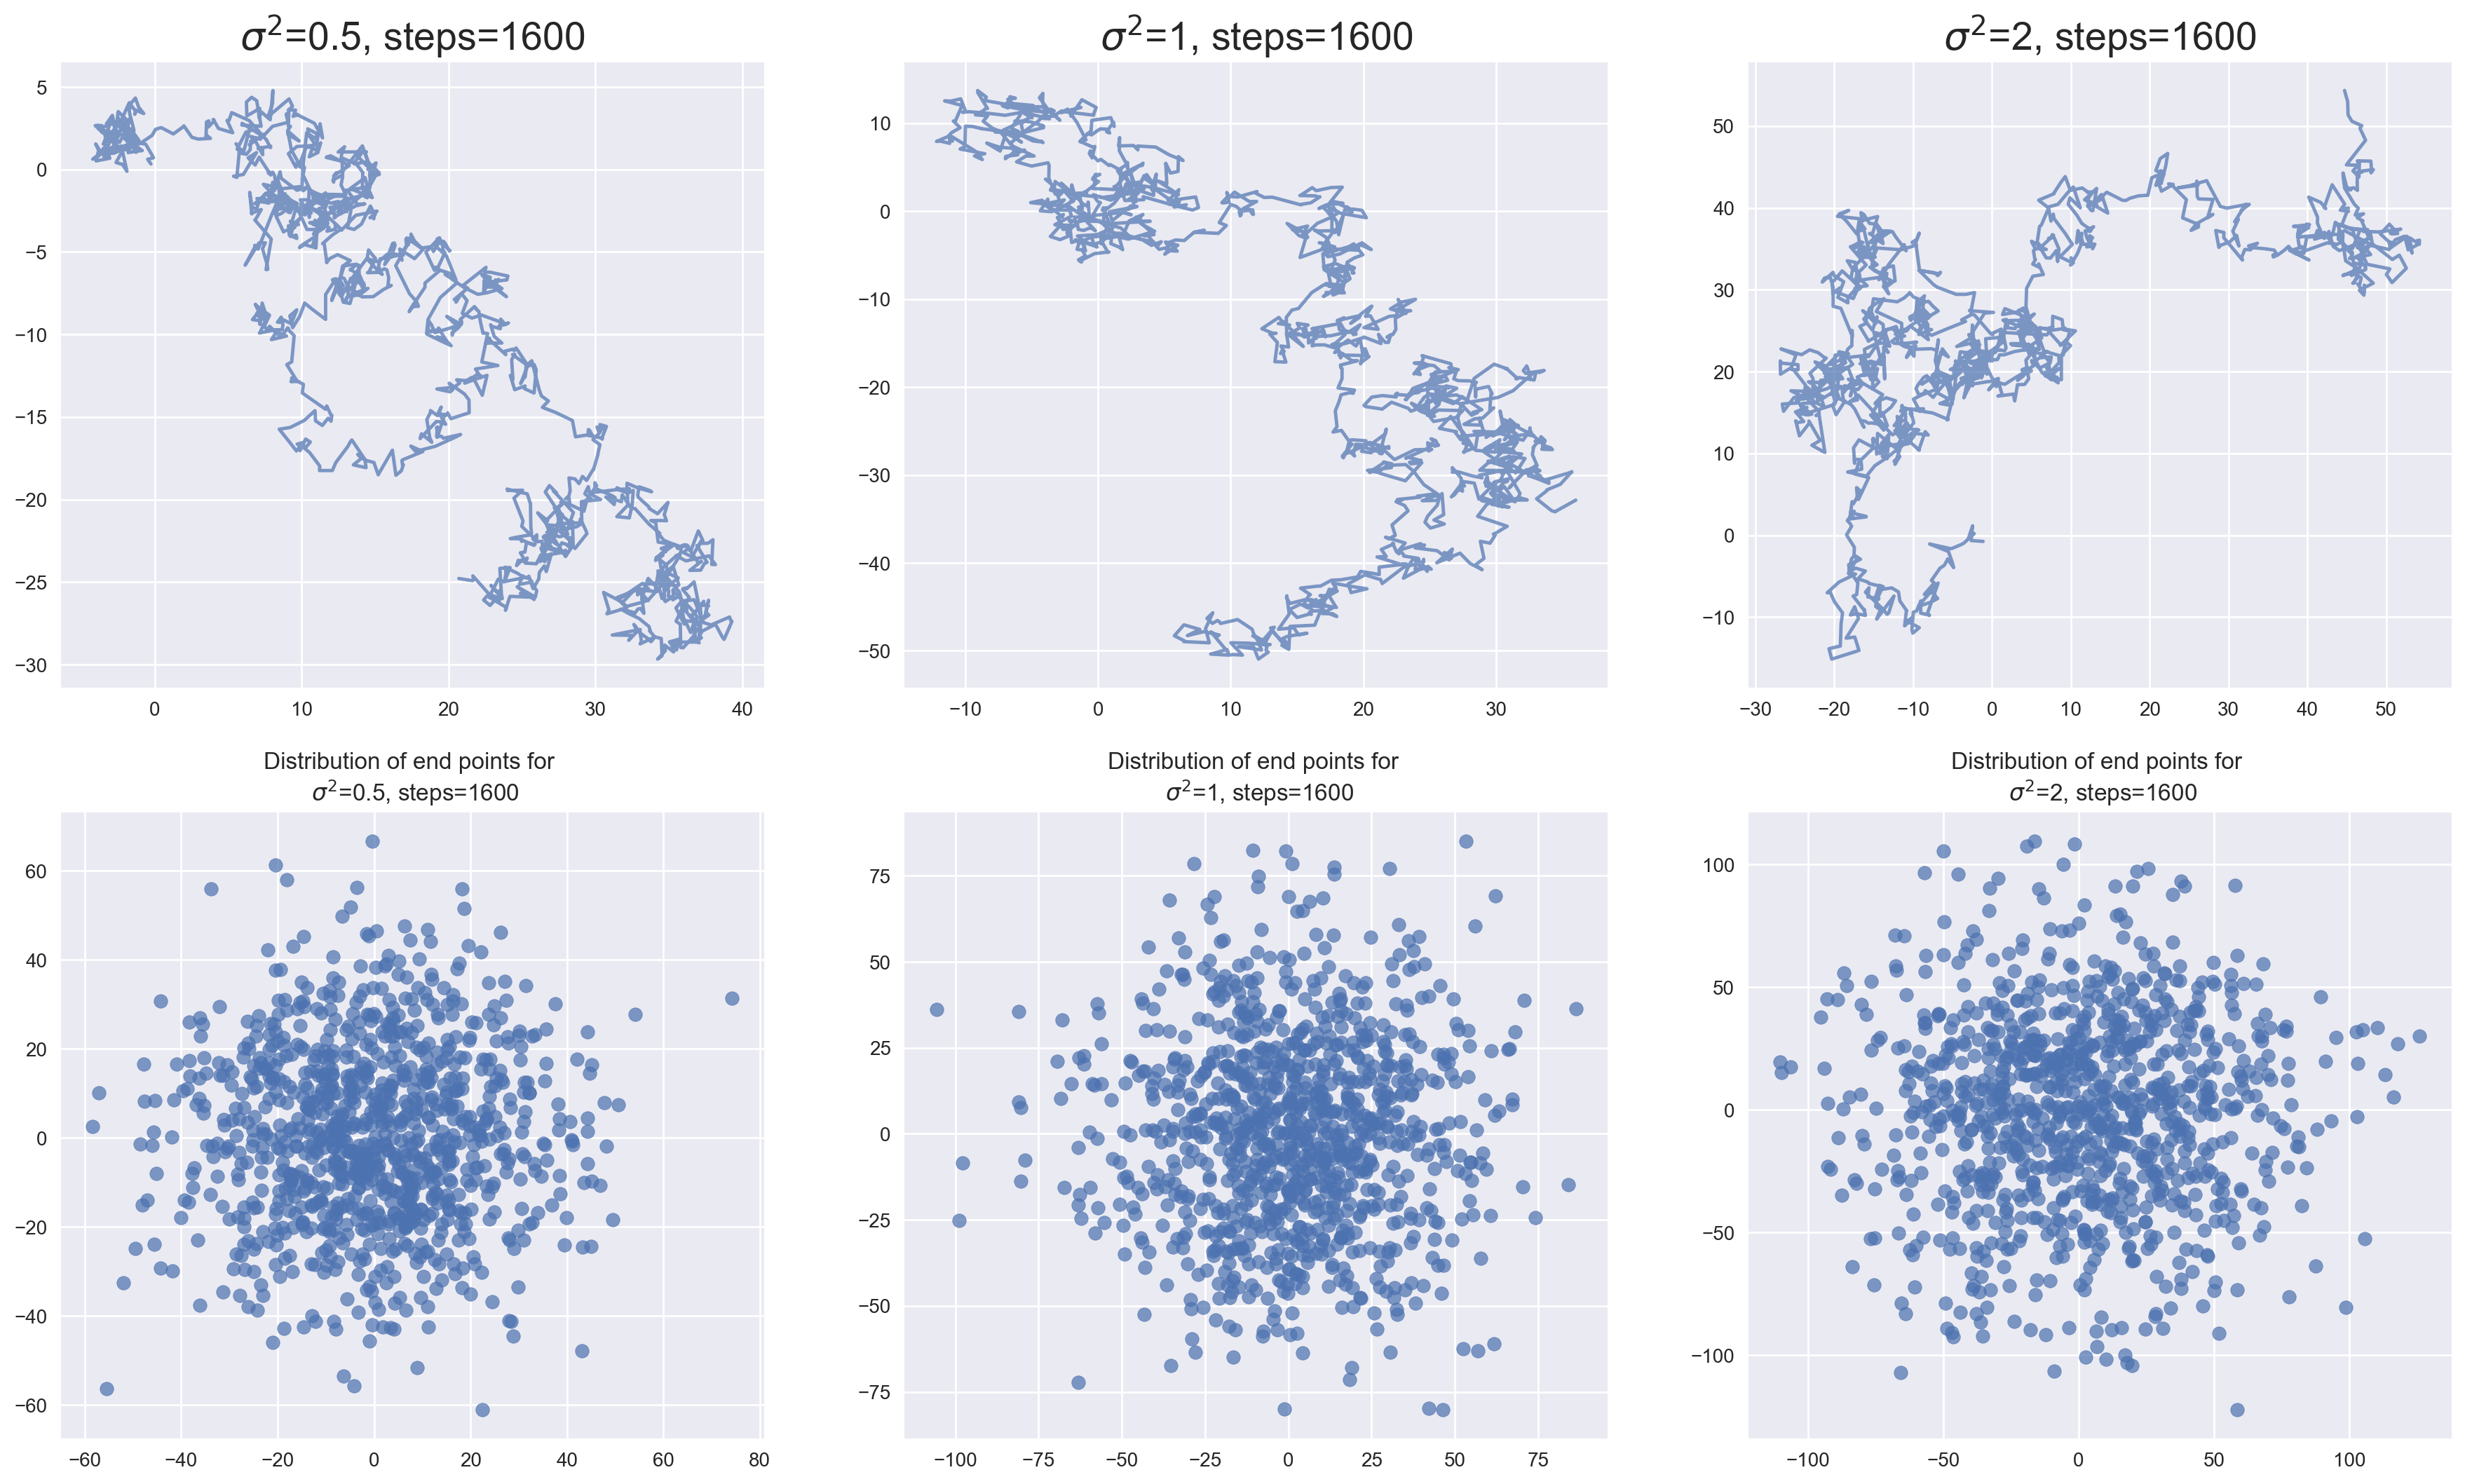

In [119]:
import math

def brownian_motion(step_n = 400, var = 1):
    #set params
    step_set = np.arange(0,360)
    pos = np.array((0,0))
    path = []

    #simulate steps in 1D
    for i in range(step_n):
        #convert the random degree [0,360) chosen to radians
        direction = math.radians(np.random.choice(step_set))
        #get step size from normal distribution with mean 0 and variance var
        step_size = np.random.normal(0, np.sqrt(var)) #numpy uses standard deviation
        #update the position according to direction and step size
        pos = pos + np.array((step_size * math.cos(direction), step_size * math.sin(direction)))
        #update the path
        path.append(pos)
        
    return np.array(path), False

def get_end_points(func, step_n, var, n_sims=1000):
    '''
    Get array of final x,y positions for n_sims number of brownian motion paths with step_n, var parameters.
    '''
    end_points = []
    absorbed_count = 0
    for i in range(n_sims):
        path, absorbed = func(step_n, var)
        if absorbed:
            absorbed_count += 1
        end_points.append(path[-1,:])
    return np.array(end_points), absorbed_count/n_sims


steps = [20,400,1600]
for step in steps:
    variances = [0.5,1,2]
    plt.figure(figsize=(22,13),dpi=200)
    
    for i in range(len(variances)):
        #plot the paths
        path, absorbed = brownian_motion(step_n = step, var = variances[i])
        plt.subplot(2,len(variances),i+1)
        plt.title(f"$\sigma^2$={variances[i]}, steps={step}", size=20)
        plt.plot(path[:,0],path[:,1], alpha=0.7)
        
        #plot density plot of end points of the walker
        plt.subplot(2,len(variances),i+4)
        end_points, absorbed_ratio = get_end_points(brownian_motion, step, variances[i])
        plt.title(f"Distribution of end points for \n $\sigma^2$={variances[i]}, steps={step}")
        plt.scatter(end_points[:,0],end_points[:,1], alpha=0.7)
        

<h2>Diffusion in the plane</h2>

Starting at the origin in the plane, carry out a random walk on the lattice of integer coordinate
points over the square [–20, 20] × [–20, 20]. Assume that there is a square hole whose boundary is
(13, 7), (14, 7), (14, 8), and (13, 8). Walks that reach this hole are absorbed, along with any walk
which reaches the boundary. Show the distribution of final positions for walks of various steps and
especially the fraction that enters the hole.

In [120]:
def diffusion(step_n = 1000, var = 1):
    #set params
    step_set = np.arange(0,360)
    pos = np.array((0,0))
    hole_x = [13,14]
    hole_y = [7,8]
    path = []

    #simulate steps in 1D
    for i in range(step_n):
        #convert the random degree [0,360) chosen to radians
        direction = math.radians(np.random.choice(step_set))
        #get step size from normal distribution with mean 0 and variance var
        step_size = np.random.normal(0, np.sqrt(var)) #numpy uses standard deviation
        #update the position according to direction and step size
        pos = pos + np.array((step_size * math.cos(direction), step_size * math.sin(direction)))
        
        #if path touches black hole, it gets absorbed
        x, y = pos[0],pos[1]
        if (hole_x[0] <= x <= hole_x[1]) and (hole_y[0] <= y <= hole_y[1]): 
            return np.array(path), True 
        
        #update the path
        path.append(pos)
        
    return np.array(path), False


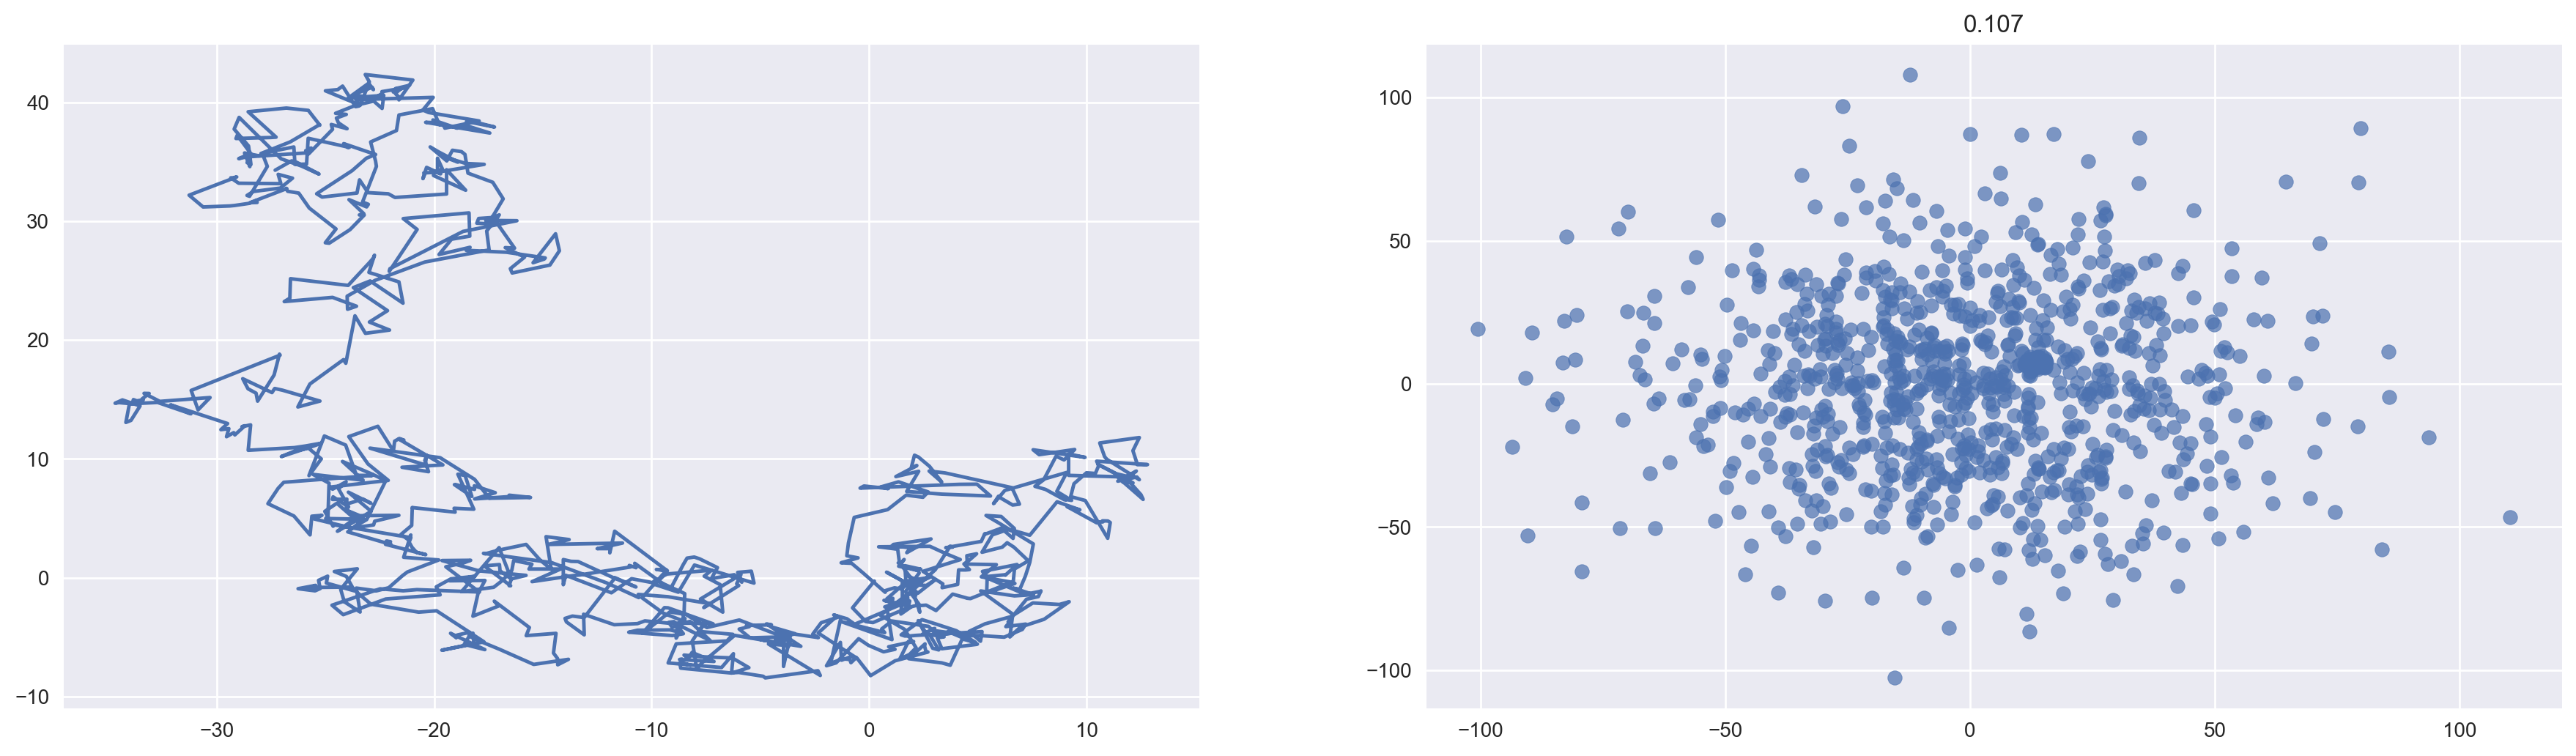

In [122]:
#path
plt.figure(figsize=(22,6),dpi=200)
plt.subplot(1,2,1)
path, absorbed = diffusion(step_n = 1000, var = 2)
plt.plot(path[:,0],path[:,1])

#density of end points
plt.subplot(1,2,2)
end_points, absorbed_ratio = get_end_points(diffusion, step_n = 1000, var = 2)
plt.title(f"{absorbed_ratio}")
plt.scatter(end_points[:,0],end_points[:,1], alpha=0.7)
plt.show()